In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
LiH = pd.read_csv('LiH.csv')
NaH = pd.read_csv('NaH.csv')
KH  = pd.read_csv('KH.csv')
RbH = pd.read_csv('RbH.csv')
CsH = pd.read_csv('CsH.csv')


LiH['without_dis'] = LiH['energy']-LiH['E-dispersion']
NaH['without_dis'] = NaH['energy']-NaH['E-dispersion']
KH['without_dis'] = KH['energy']-KH['E-dispersion']
RbH['without_dis'] = RbH['energy']-RbH['E-dispersion']
CsH['without_dis'] = CsH['energy']-CsH['E-dispersion']

LiH.head()

,cell_length,energy,E-dispersion,without_dis
0,3.517239,-23.458076,-1.32277,-22.135306
1,3.617239,-24.019365,-1.20817,-22.811195
2,3.717239,-24.413684,-1.10521,-23.308474
3,3.817239,-24.666217,-1.01151,-23.654707
4,3.917239,-24.806442,-0.92519,-23.881252


In [135]:
def plotG(df):
    plt.scatter(df['cell_length'], df['energy'], label='Total Energy')
    plt.scatter(df['cell_length'], df['without_dis'], label='Energy without dispersion')
    plt.xlabel('Cell Length')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

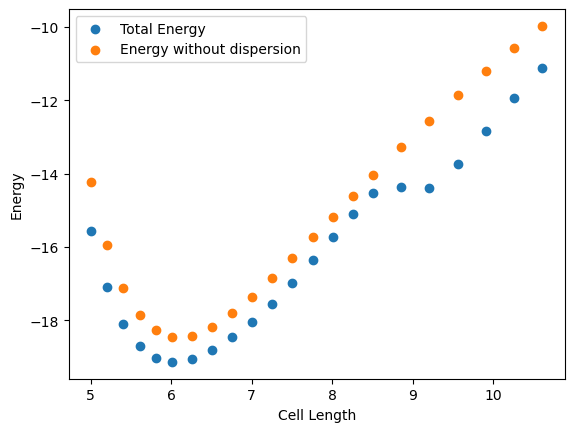

In [136]:
plotG(RbH)
# plotG(NaH)
# plotG(KH)

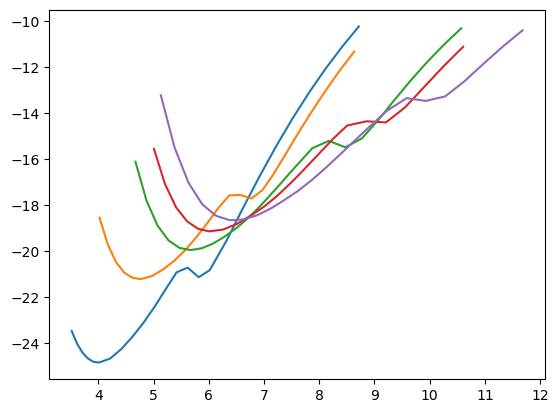

In [137]:
# plt.plot(LiH['cell_length'],LiH['without_dis'])
# plt.plot(LiH['cell_length'],LiH['energy'])
plt.plot(LiH['cell_length'],LiH['energy'])
plt.plot(NaH['cell_length'],NaH['energy'])
plt.plot(KH['cell_length'],KH['energy'])
plt.plot(RbH['cell_length'],RbH['energy'])
plt.plot(CsH['cell_length'],CsH['energy'])
plt.show()
# plt.plot(CsH['cell_length'],CsH['E-dispersion'])

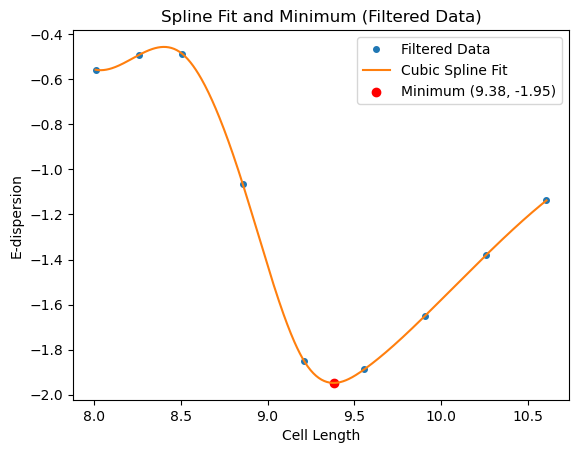

Minimum point is at x = 9.3809, y = -1.9476


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.optimize import minimize_scalar

filtered_data = RbH[RbH['cell_length'] > 8]


filtered_data = filtered_data.groupby('cell_length', as_index=False).mean()

# Drop NaN or infinite values
filtered_data = filtered_data.dropna()
filtered_data = filtered_data[np.isfinite(filtered_data['E-dispersion'])]

# Sort the data
filtered_data = filtered_data.sort_values(by='cell_length')

# Extract x and y values
x = filtered_data['cell_length']
y = filtered_data['E-dispersion']

# Fit a cubic spline (relaxing s for smoothing)
spline = UnivariateSpline(x, y, k=3, s=1e-5)

# Generate smooth curve
x_smooth = np.linspace(min(x), max(x), 500)
y_smooth = spline(x_smooth)

# Find the minimum of the spline
result = minimize_scalar(spline, bounds=(min(x), max(x)), method='bounded')
min_x = result.x
min_y = spline(min_x)

# Plot the results
plt.plot(x, y, 'o', label='Filtered Data', markersize=4)  # Scatter points
plt.plot(x_smooth, y_smooth, label='Cubic Spline Fit')
plt.scatter([min_x], [min_y], color='red', label=f'Minimum ({min_x:.2f}, {min_y:.2f})')
plt.legend()
plt.xlabel('Cell Length')
plt.ylabel('E-dispersion')
plt.title('Spline Fit and Minimum (Filtered Data)')
plt.show()

print(f"Minimum point is at x = {min_x:.4f}, y = {min_y:.4f}")


In [139]:
def findMinX(df):
    min_y_index = df["energy"].idxmin()
    min_x_value = df.loc[min_y_index, "cell_length"]
    
    # print(min_x_value,df['E-dispersion'][min_y_index])
    print(min_y_index)
    return abs(df['E-dispersion'][min_y_index])

In [140]:
val_LiH = abs(min(LiH['E-dispersion']))
val_NaH = abs(min(NaH['E-dispersion']))
val_KH = abs(min(KH['E-dispersion']))
val_RbH = abs(min(RbH['E-dispersion']))
val_CsH = abs(min(CsH['E-dispersion']))

base_LiH = abs(findMinX(LiH))
base_NaH = abs(findMinX(NaH))
base_KH = abs(findMinX(KH))
base_RbH = abs(findMinX(RbH))
base_CsH = abs(findMinX(CsH))

total_LiH = abs(min(LiH['energy']))
total_NaH = abs(min(NaH['energy']))
total_KH = abs(min(KH['energy']))
total_RbH = abs(min(RbH['energy']))
total_CsH = abs(min(CsH['energy']))


print(val_LiH/base_LiH ,val_NaH/base_NaH,val_KH/base_KH,val_RbH/base_RbH)
print(total_LiH, total_NaH, total_KH, total_RbH)

5
5
5
5
5
3.2590139112330845 2.7208251105255616 3.1638754406236744 2.7396093704586413
24.829256 21.204923 19.946678 19.132743


[2.75504, 2.46787, 2.16311, 1.88518, 1.70797]


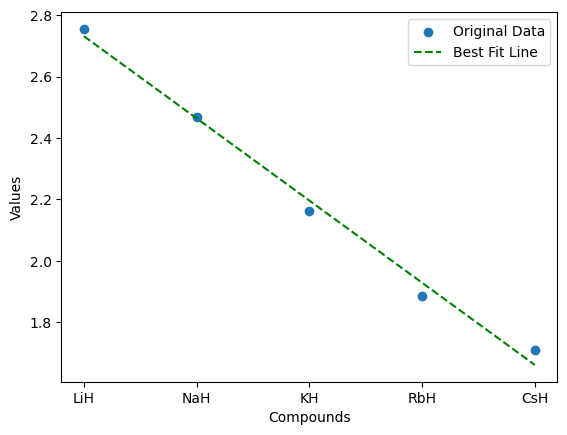

In [141]:
x = ['LiH', 'NaH', 'KH', 'RbH', 'CsH']
y = [val_LiH, val_NaH, val_KH, val_RbH, val_CsH]
print(y)

x_indices = np.arange(len(x))

coefficients = np.polyfit(x_indices, y, 1)  
best_fit_line = np.polyval(coefficients, x_indices)

plt.scatter(x_indices, y, label='Original Data', marker='o')

plt.plot(x_indices, best_fit_line, label='Best Fit Line', linestyle='--', color='green')

plt.xticks(ticks=x_indices, labels=x)



plt.xlabel('Compounds')
plt.ylabel('Values')
plt.legend()
plt.show()


In [142]:
coefficients = np.polyfit(x_indices, y, 1)
y_pred = np.polyval(coefficients, x_indices)

y_mean = np.mean(y)

ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)

r2 = 1 - (ss_residual / ss_total)
print(f"R^2 value: {r2}")


R^2 value: 0.9920239825382047


Total Energy have the same trend

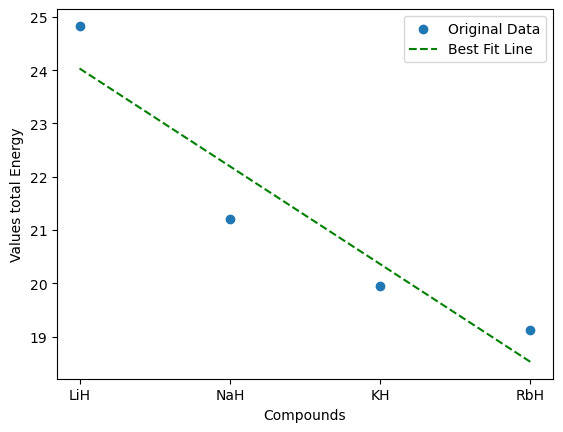

In [143]:
x = ['LiH', 'NaH', 'KH', 'RbH']
y = [total_LiH, total_NaH, total_KH, total_RbH]


x_indices = np.arange(len(x))

coefficients = np.polyfit(x_indices, y, 1)  
best_fit_line = np.polyval(coefficients, x_indices)

plt.scatter(x_indices, y, label='Original Data', marker='o')

plt.plot(x_indices, best_fit_line, label='Best Fit Line', linestyle='--', color='green')

plt.xticks(ticks=x_indices, labels=x)



plt.xlabel('Compounds')
plt.ylabel('Values total Energy')
plt.legend()
plt.show()


[110.95942625 116.3819364  108.44462421 101.9195209   91.70303359]


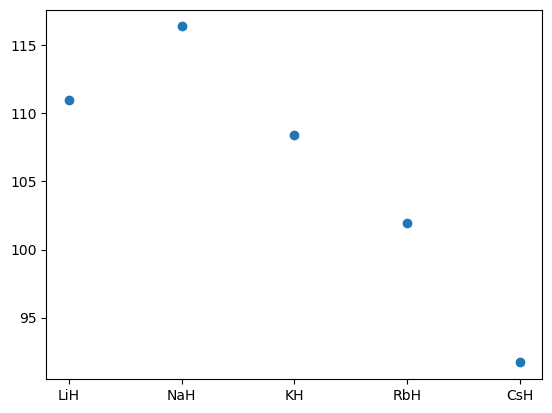

In [144]:
# dividing by base values 
x = ['LiH','NaH','KH','RbH','CsH']
# temp = np.array([val_LiH, val_NaH, val_KH, val_RbH,val_CsH])
# print(temp)
# y = np.array([2.79/base_LiH ,2.48/base_NaH, 2.16/base_KH, 1.95/base_CsH,1.7103/base_CsH,])
# bases = np.array([base_LiH, base_NaH, base_KH, base_RbH])
# print(bases)
y = np.array([val_LiH/total_LiH ,val_NaH/total_NaH,val_KH/total_KH, 1.95/total_RbH,1.7103/total_CsH])*1000
print(y)
fac = 0.03

y_redox = (np.array([3.05,2.71,2.94,2.94])-2.7)*fac
plt.scatter(x,y)
plt.show()

#### Significance of Standard Reduction Potential
Higher Magnitude means its more likely to release an electron so the Hydrogen willl have a higher negetive charge. This is not refected in the electronegetivity difference. 


E = k * ENs
1. redox potential
2. delta EN
3. radius ratio
4. Extent of covalancy
5. Sigma and pi delocalisation 
6. Effective nuclear charge

[ 1.288  1.331  1.466  1.494 -0.82 ]


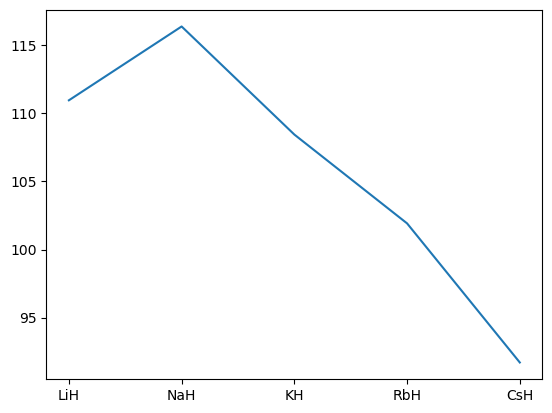

In [145]:
ENs = 2.2 - np.array([0.912,0.869,0.734,0.706,3.02])
zeff = np.array([1.3,2.2,3.7,4.7])
print(ENs)
ENs **= 1
# y = y/ENs

x = ['LiH', 'NaH', 'KH', 'RbH','CsH']
# y = [total_LiH, total_NaH, total_KH, total_RbH]


plt.plot(x,y)
plt.show()

In [146]:
coefficients = np.polyfit(x_indices, y, 1)
y_pred = np.polyval(coefficients, x_indices)

y_mean = np.mean(y)

ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)

r2 = 1 - (ss_residual / ss_total)
print(f"R^2 value: {r2}")

TypeError: expected x and y to have same length


[Electro negetivity](https://www.britannica.com/science/alkali-metal/General-properties-of-the-group)

[Redox potential](https://barron.rice.edu/Courses/360/360_04_redox.pdf)

[Zeff values](https://en.wikipedia.org/wiki/Effective_nuclear_charge)

[atomic_raius](https://en.wikipedia.org/wiki/Alkali_metal)

In [ ]:
redox_potentials = np.array([-3.05,-2.71,-2.94,-2.94,-3.02])
ENs = 2.2 - np.array([0.98,0.93,0.82,0.82,0.79])
atomic_radius = np.array([152,186,227,248,265])

ENs


array([1.22, 1.27, 1.38, 1.38, 1.41])

In [159]:
df = pd.DataFrame({'redox_potentials':redox_potentials,
                    'atomic_radius':atomic_radius,
                     'y':y})
df.head()

,redox_potentials,atomic_radius,y
0,-3.05,152,110.959426
1,-2.71,186,116.381936
2,-2.94,227,108.444624
3,-2.94,248,101.919521
4,-3.02,265,91.703034


In [160]:
df.head()
corr =df.corr()

corelations = corr['y'].sort_values(ascending=True)
corelations

atomic_radius      -0.818154
redox_potentials    0.591780
y                   1.000000
Name: y, dtype: float64